# Trabalho sobre Perceptron em Redes Neurais Artificiais

Objetivo: Criar um material educacional em formato Jupyter Notebook (.ipynb) abordando os fundamentos do Perceptron, com explicações claras, fórmulas, gráficos, animações e códigos implementados manualmente (sem bibliotecas externas para o Perceptron).

# 1-Introdução ao modelo de Perceptron

## 1.1-Explicação conceitual
O Perceptron é um dos algoritmos de aprendizado de máquina supervisionado mais básicos, proposto por Frank Rosenblatt em 1957. Ele é um classificador linear binário. Isso significa que sua função principal é separar duas classes de dados usando uma linha em duas dimensões, ou um hiperplano em dimensões maiores. O objetivo é encontrar essa fronteira de decisão linear ideal. Ele foi inspirado no neurônio biológico e a sua ideia principal era criar um modelo computacional que pudesse aprender a tomar decisões, assim como um cérebro aprende.

### Inspiração Biológica
Imagine um neurônio no seu cérebro. Ele recebe sinais de outros neurônios através de "braços" chamados dendritos. Esses sinais passam por conexões chamadas sinapses, que podem ser mais fortes ou mais fracas. Se a soma dos sinais que chegam ao neurônio for forte o suficiente, ele "dispara" e envia um sinal para outros neurônios através de um "fio" chamado axônio.

O Perceptron tenta imitar esse processo da seguinte forma:

*   **Entradas (Inputs):** Assim como os dendritos recebem sinais, o Perceptron recebe múltiplas entradas. Cada entrada representa uma informação ou característica do que estamos tentando classificar (por exemplo, se estamos tentando classificar fotos de maçãs e bananas, as entradas poderiam ser a cor e o formato da fruta).
*   **Pesos (Weights):** Cada entrada tem um peso associado a ela (análogo à força das sinapses). Esses pesos indicam a importância de cada entrada para a decisão do Perceptron. Um peso maior significa que essa entrada tem uma influência maior.
*   **Soma Ponderada:** O Perceptron multiplica cada entrada pelo seu peso correspondente e soma todos esses resultados. Isso é como o neurônio biológico somando os sinais que recebe.
*   **Bias (Limiar):** É adicionado um valor chamado bias (ou limiar) à soma ponderada. O bias determina o quão fácil é para o Perceptron "disparar". Pense nele como um valor mínimo que a soma ponderada precisa atingir para que o Perceptron produza uma saída. No neurônio biológico, isso seria o limiar de ativação.
*   **Função de Ativação:** O resultado da soma ponderada mais o bias passa por uma função de ativação. A função de ativação original do Perceptron era uma função degrau. Isso significa que se o resultado da soma for maior que um certo valor (determinado pelo bias e pela função), a saída do Perceptron é um valor (por exemplo, 1, representando uma classe). Caso contrário, a saída é outro valor (por exemplo, 0, representando outra classe). É como o neurônio decidindo se "dispara" ou não.

### O Processo de Aprendizagem
A parte crucial do Perceptron é como ele aprende a tomar as decisões corretas. Inicialmente, os pesos e o bias podem ser definidos de forma aleatória, já que isso permite que eles aprendam a detectar diferentes padrões nos dados. O processo de aprendizagem acontece da seguinte maneira:

1.  **Apresentação de Dados:** Mostramos ao Perceptron muitos exemplos dos dados que queremos que ele aprenda a classificar. Cada exemplo tem suas entradas (características) e a resposta correta (o "rótulo" da classe).
2.  **Previsão:** O Perceptron recebe as entradas de um exemplo, calcula a soma ponderada e aplica a função de ativação para fazer uma previsão sobre a classe a que esse exemplo pertence.
3.  **Comparação com a Resposta Correta:** Comparamos a previsão do Perceptron com a resposta correta que sabemos para aquele exemplo.
4.  **Ajuste dos Pesos e Bias:** Se a previsão estiver errada, o Perceptron ajusta seus pesos e o bias. A ideia é que o ajuste seja feito de forma que, na próxima vez que um exemplo semelhante for apresentado, a previsão tenha mais chances de ser correta. A regra de aprendizado do Perceptron original era simples: se ele classificasse incorretamente, os pesos seriam ajustados na direção que diminuiria o erro. Por exemplo, se ele classificasse um exemplo como "maçã" quando era "banana", os pesos associados às características de "banana" seriam aumentados, e os pesos associados às características de "maçã" seriam diminuídos. O bias também seria ajustado para tornar a ativação mais ou menos provável.
5.  **Repetição:** Esse processo de apresentar exemplos, fazer previsões, comparar e ajustar os pesos e o bias é repetido muitas vezes (épocas). O objetivo é que, a cada repetição, o Perceptron melhore suas previsões e se torne capaz de classificar corretamente os dados, mesmo aqueles que ele nunca viu antes.

Esses são alguns dos conceitos fundamentais por trás do Perceptron, sua inspiração e funcionamento geral, nas próximas sessões adentraremos mais em sua explicação. Vale ressaltar ainda que o Perceptron só consegue lidar com problemas linearmente separáveis já que sua fronteira de decisão é sempre um hiperplano (uma linha reta em duas dimensões, um plano em três dimensões e assim por diante). Consequentemente, se um conjunto de dados não pode ser dividido em classes por um hiperplano, ou seja, é não linearmente separável, um único Perceptron não conseguirá encontrar uma solução para o problema de classificação.

## 1.2-Estrutura Básica do Perceptron 
Como visto na seção anterior, a estrutura de um Perceptron pode ser decomposta nos seguintes componentes:

1.  **Entradas ($x_i$):** São os valores numéricos que representam as características da amostra que queremos classificar. Se tivermos $n$ características, teremos $n$ entradas: $x_1, x_2, ..., x_n$.
2.  **Pesos ($w_i$):** Cada entrada $x_i$ tem um peso $w_i$ associado. O peso determina a influência que a respectiva entrada terá na saída do neurônio. Pesos maiores (em módulo) indicam maior importância. Os pesos são os parâmetros que o Perceptron aprende durante o treinamento.
3.  **Bias ($b$):** É um valor adicional que não está associado a nenhuma entrada específica. Ele atua como um limiar ajustável. Matematicamente, ele desloca a fronteira de decisão, permitindo que a linha/plano de separação não precise necessariamente passar pela origem. Frequentemente, o bias é tratado como um peso $w_0$ associado a uma entrada fixa $x_0 = 1$.
4.  **Função de Soma ($u$):** Calcula a soma ponderada das entradas mais o bias. É o resultado da combinação linear das entradas e pesos:
    $$ u = \sum_{i=1}^{n} (w_i \cdot x_i) + b = (w_1 x_1 + w_2 x_2 + ... + w_n x_n) + b $$
5.  **Função de Ativação ($f(u)$):** Aplica uma transformação ao resultado da soma ($u$) para produzir a saída final do neurônio ($\hat{y}$). Para uma função de ativação degrau, a saída do Perceptron é:
    $$ \hat{y} = f(u) = \begin{cases} 1 & \text{se } u \ge \theta \\ 0 & \text{se } u < \theta \end{cases} $$
    Onde $\theta$ é um limiar (threshold). Frequentemente, o limiar é incorporado ao bias, e a comparação é feita com 0:
    $$ \hat{y} = f(u) = \begin{cases} 1 & \text{se } u \ge 0 \\ 0 & \text{se } u < 0 \end{cases} $$
    Esta é a forma que usaremos.

6.  **Saída ($\hat{y}$):** O valor final produzido pelo neurônio após a aplicação da função de ativação (0 ou 1 no caso binário).

**Representação Gráfica do Perceptron:**


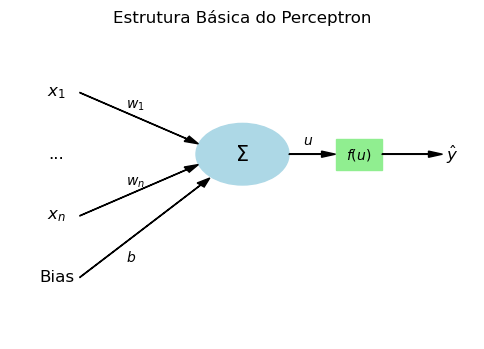

In [61]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4))
# Entradas
ax.text(0.1, 0.8, '$x_1$', ha='center', va='center', fontsize=12)
ax.text(0.1, 0.6, '...', ha='center', va='center', fontsize=12)
ax.text(0.1, 0.4, '$x_n$', ha='center', va='center', fontsize=12)
ax.text(0.1, 0.2, 'Bias', ha='center', va='center', fontsize=12) 
# Neurônio (Soma e Ativação)
ax.add_patch(plt.Circle((0.5, 0.6), 0.1, fill=True, color='lightblue'))
ax.text(0.5, 0.6, 'Σ', ha='center', va='center', fontsize=15)
ax.add_patch(plt.Rectangle((0.7, 0.55), 0.1, 0.1, fill=True, color='lightgreen'))
ax.text(0.75, 0.6, '$f(u)$', ha='center', va='center', fontsize=10)
# Setas e Pesos
ax.arrow(0.15, 0.8, 0.23, -0.15, head_width=0.02, head_length=0.03, fc='black', ec='black')
ax.text(0.25, 0.75, '$w_1$', fontsize=10)
ax.arrow(0.15, 0.4, 0.23, 0.15, head_width=0.02, head_length=0.03, fc='black', ec='black')
ax.text(0.25, 0.50, '$w_n$', fontsize=10)
ax.arrow(0.15, 0.2, 0.26, 0.3, head_width=0.02, head_length=0.03, fc='black', ec='black')
ax.text(0.25, 0.25, '$b$', fontsize=10)
# Conexões internas e Saída
ax.arrow(0.6, 0.6, 0.07, 0, head_width=0.02, head_length=0.03, fc='black', ec='black')
ax.text(0.63, 0.63, '$u$', fontsize=10)
ax.arrow(0.8, 0.6, 0.1, 0, head_width=0.02, head_length=0.03, fc='black', ec='black')
ax.text(0.95, 0.6, '$\hat{y}$', ha='center', va='center', fontsize=12)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
plt.title("Estrutura Básica do Perceptron")
plt.show()


## 1.3-Fórmulas Matemáticas
Nessa seção vamos abordar o desenvolvimento matemático e a implementação dessas fórmulas no Perceptron.

### a. Multiplicação Matricial/Vetorial
A multiplicação matricial/vetorial no Perceptron refere-se ao cálculo do produto escalar entre os vetores de entrada ($x$) e pesos ($w$), seguido pela adição do bias ($b$). Este processo é fundamental para computar a ativação do neurônio antes de aplicar a função de ativação. A seguir vamos realizar sua demostração para os seguintes componentes:

*   **Entrada ($x$):** Vetor de dimensão $n$:
$$ x = [x_1, x_2, \dots, x_n] $$

* **Pesos ($w$):** Vetor de dimensão $n$:  
$$ w = [w_1, w_2, \dots, w_n] $$

* **Bias ($b$):** Escalar que ajusta a saída independentemente das entradas.

Realizando o cálculo do produto escalar entre os vetores $x$ e $w$, temos:

$$
x \cdot w = \sum_{i=1}^{n} (w_i \cdot x_i) = w_1 x_1 + w_2 x_2 + \dots + w_n x_n
$$

Dessa forma, adicionando o bias $b$, temos o valor de ativação linear $u$ igual à:

$$
u = \sum_{i=1}^{n} (w_i \cdot x_i) + b = (w_1 x_1 + w_2 x_2 + \dots + w_n x_n) + b
$$

Que é a mesma já definida anteriormente. 

**Implementação:**


In [95]:
import numpy as np 

# Implementação da função para calcular u 
def calcular_u(entradas, pesos, bias):
    """ Calcula a soma ponderada + bias """
    # entradas: lista ou array numpy [x1, x2, ..., xn]
    # pesos: lista ou array numpy [w1, w2, ..., wn]
    # bias: float
    
    # Pré-requisito do produdo escalar: Os dois vetores devem ter o mesmo número de elementos (a mesma dimensão).
    if len(entradas) != len(pesos):
        raise ValueError("Número de entradas e pesos deve ser igual.")

    u = 0.0
    # Loop for para a multiplicação e soma
    for i in range(len(entradas)):
        u += entradas[i] * pesos[i]
    u += bias # Adiciona o bias
    return u

# Exemplo rápido de utilização 
exemplo_entradas = np.array([0.5, 1.5])
exemplo_pesos = np.array([0.8, -0.2])
exemplo_bias = 0.1
u_calculado = calcular_u(exemplo_entradas, exemplo_pesos, exemplo_bias)
# Esperado: (0.5 * 0.8) + (1.5 * -0.2) + 0.1 = 0.4 - 0.3 + 0.1 = 0.2
print(f"Exemplo calcular_u: Entradas={exemplo_entradas}, Pesos={exemplo_pesos}, Bias={exemplo_bias} => u={u_calculado:.4f}")

Exemplo calcular_u: Entradas=[0.5 1.5], Pesos=[ 0.8 -0.2], Bias=0.1 => u=0.2000


Vale ressaltar ainda que no caso de um conjunto de amostras $X$ dado abaixo: 

$$
X =
\begin{bmatrix}
x_{1,1} & x_{1,2} & \cdots & x_{1,j} \\
x_{2,1} & x_{2,2} & \cdots & x_{2,j} \\
\vdots & \vdots & \ddots & \vdots \\
x_{i,1} & x_{i,2} & \cdots & x_{i,j}
\end{bmatrix}
$$
Onde $i$ é o número de amostras e $j$ são as características (entradas), vamos ter um vetor de pesos $W$ de dimensão $j$ associado a ele. Assim, podemos reescrever o produto escalar como sendo a multiplicação matricial entre o conjunto de amostras $X$ e a matriz coluna $W$, como podemos ver abaixo: 

$$
W =
\begin{bmatrix}
w_1 \\
w_2 \\
\vdots \\
w_j
\end{bmatrix}
$$

O produto $X \cdot W$ nos fornece um vetor coluna $U$ com $i$ elementos, onde cada elemento representa a soma ponderada de uma amostra:

$$
U = X \cdot W =
\begin{bmatrix}
x_{1,1} & x_{1,2} & \cdots & x_{1,j} \\
x_{2,1} & x_{2,2} & \cdots & x_{2,j} \\
\vdots & \vdots & \ddots & \vdots \\
x_{i,1} & x_{i,2} & \cdots & x_{i,j}
\end{bmatrix}
\cdot
\begin{bmatrix}
w_1 \\
w_2 \\
\vdots \\
w_j
\end{bmatrix}
=
\begin{bmatrix}
u_1 \\
u_2 \\
\vdots \\
u_i
\end{bmatrix}
$$

Onde cada $u_k$ (para $k = 1, 2, \dots, i $) é dado por:

$$
u_k = \sum_{l=1}^{j} x_{k,l} \cdot w_l + b
$$

Adicionando o limiar $b$, temos a ativação final antes da aplicação da função de ativação. Essa notação facilita o processamento vetorial e permite a implementação eficiente do Perceptron para múltiplas amostras simultaneamente.

### b. Função de Ativação
A função de ativação degrau unitário é crucial no Perceptron, pois transforma o valor de ativação $u$ (que é contínuo) em uma saída binária, permitindo decisões do tipo "sim/não" ou "classe A/classe B", como já vimos anteriormente. Podemos explicar também da seguinte forma, a combinação linear $u = w \cdot x + b$ define uma linha, um plano ou um hiperplano e equação $w \cdot x + b = 0$ representa a fronteira de decisão linear. A função degrau usa essa fronteira para tomar a decisão. Todos os pontos de entrada $x $ que resultam em $u \geq 0$ (ou seja, estão de um lado da fronteira, ou exatamente sobre ela) são classificados como 1. Todos os pontos que resultam em $u < 0$ (estão do outro lado da fronteira) são classificados como 0. Mais sobre a fronteira de decisão será discutido na implementação do Perceptron para os casos da OR e AND

**Implementação:**

In [63]:
def funcao_degrau(u):
    """ Função de ativação degrau unitário """
    return 1 if u >= 0 else 0

# Exemplo
print(f"Teste degrau(0.2) = {funcao_degrau(0.2)}")
print(f"Teste degrau(0) = {funcao_degrau(0)}")
print(f"Teste degrau(-0.1) = {funcao_degrau(-0.1)}")

Teste degrau(0.2) = 1
Teste degrau(0) = 1
Teste degrau(-0.1) = 0


### c. Função de Custo (Erro)

Para treinar o Perceptron, precisamos de uma forma de medir o quão errada foi a sua previsão. A regra de aprendizado do Perceptron usa um erro simples. O erro é a diferença entre a saída desejada (o rótulo verdadeiro da amostra, $y$) e a saída predita pelo Perceptron ($\hat{y}$). Utilizando a função degrau como função de ativação nos vamos ter:
*   **Fórmula (Erro Absoluto Simples):**
    $$ E = y - \hat{y} $$
    Onde:
    *   $y$: O valor esperado (rótulo real, 0 ou 1).
    *   $\hat{y}$: O valor predito pelo Perceptron (saída da função degrau, 0 ou 1).
*   **Possíveis Valores do Erro:**
    *   Se $y=1$ e $\hat{y}=0$ (erro), então $E = 1 - 0 = 1$.
    *   Se $y=0$ e $\hat{y}=1$ (erro), então $E = 0 - 1 = -1$.
    *   Se $y=\hat{y}$ (acerto), então $E = 0$.

**Implementação:**

In [64]:
def calcular_erro_absoluto(y_desejado, y_predito):
         """ Calcula o erro absoluto simples. """
         return y_desejado - y_predito

### d. Regra de Atualização dos Pesos e Bias (Regra de Aprendizado do Perceptron)

Esta é a regra que permite ao Perceptron aprender com seus erros. Os pesos e o bias são ajustados apenas quando ocorre um erro de classificação ($E \neq 0$). O ajuste é proporcional ao erro $E$ e à entrada $x_i$ correspondente para os pesos. A taxa de aprendizado ($\eta$, eta) controla a magnitude desse ajuste.
*   **Fórmulas de Atualização:**
    *   Atualização para cada peso $w_i$:
        $$ \Delta w_i = \eta \cdot E \cdot x_i $$
        $$ w_i(\text{novo}) = w_i(\text{antigo}) + \Delta w_i $$
    *   Atualização para o bias $b$:
        $$ \Delta b = \eta \cdot E $$
        $$ b(\text{novo}) = b(\text{antigo}) + \Delta b $$

Podemos visualizar essas fórmulas da seguinte maneira. Considerando os possíveis valores do erro discutidos na sessão anterior para uma função de ativação degrau, temos que:
*   Se $E=1$ (previu 0, mas era 1): Os pesos $w_i$ são aumentados para entradas $x_i$ positivas e diminuídos para $x_i$ negativas. O bias $b$ também aumenta. Isso torna a soma $u$ mais provável de ser positiva (ou menos negativa) para essa entrada ou similares no futuro.
*   Se $E=-1$ (previu 1, mas era 0): Os pesos $w_i$ são diminuídos para entradas $x_i$ positivas e aumentados para $x_i$ negativas. O bias $b$ diminui. Isso torna a soma $u$ mais provável de ser negativa (ou menos positiva).

Já para taxa de aprendizado ($\eta$), podemos fazer as seguintes considerações:
*   É um hiperparâmetro (um valor definido antes do treinamento, geralmente pequeno como 0.1, 0.01, ou 0.001).
*   Controla o tamanho do "passo" que damos ao ajustar os pesos.
*   Se $\eta$ for muito grande, o ajuste pode ser excessivo, fazendo o algoritmo oscilar ou divergir (nunca encontrar uma solução estável).
*   Se $\eta$ for muito pequeno, o aprendizado pode ser muito lento, exigindo muitas épocas para convergir.
*   A escolha de $\eta$ pode afetar a velocidade de convergência e a estabilidade do aprendizado.

Vale ressaltar ainda que o Teorema da Convergência do Perceptron garante que, se os dados forem linearmente separáveis, o algoritmo do Perceptron encontrará uma solução (um conjunto de pesos e bias que separa as classes) em um número finito de passos. A taxa de aprendizado $\eta$ afeta quantos passos são necessários, mas não se a convergência ocorrerá (desde que $\eta > 0$).

**Implementação:** Veremos ela na próxima seção.

### 1.4 Explicação passo a passo das fórmulas e do funcionamento do algoritmo  

Diante dessas fórmulas apresentadas, podemos partir para o funcionamento e explicação do algoritmo de treinamento do Perceptron, que segue estes passos:

1.  **Inicialização:**
    *   Inicialize os **pesos** ($w_1, w_2, ..., w_n$) com valores aleatórios.
    *   Inicialize o **bias** ($b$) com um valor aleatório.
    *   Defina a **taxa de aprendizado** ($\eta$), um valor positivo pequeno (exemplo: 0.1).
    *   Defina o **número máximo de épocas** (iterações sobre todo o conjunto de treinamento) ou outro critério de parada.

Lembrando que a inicialização dos pesos e bias com valores aleatórios permite que eles aprendam a detectar diferentes padrões nos dados (eles "caminham" por caminhos diferentes)

2.  **Loop de Treinamento (Épocas):**
    *   Para cada época (de 1 até o máximo definido):
        *   Inicialize um contador de erros para esta época (`erros_epoca = 0`).
        *   Para cada amostra de treinamento ($X, y$) no conjunto de dados (onde $X$ é o vetor de características e $y$ é o rótulo verdadeiro):
            *   **a. Calcular a Saída Predita ($\hat{y}$):**
                *   Calcule a soma ponderada $u$ usando a implementação:
                    $$ u = \sum_{i=1}^{n} (w_i \cdot x_i) + b $$
                *   Aplique a função de ativação degrau:
                    $$ \hat{y} = f(u) $$
            *   **b. Calcular o Erro ($E$):**
                $$ E = y - \hat{y} $$
            *   **c. Atualizar Pesos e Bias:**
                *   A atualização ocorre somente se $E \neq 0$.
                *   Para cada peso $w_i$ (de $i=1$ até $n$):
                    $$ w_i = w_i + \eta \cdot E \cdot x_i $$
                *   Atualize o bias:
                    $$ b = b + \eta \cdot E $$
                *   Incremente o contador de erros da época (`erros_epoca += 1`).
        *   Após iterar por todas as amostras, armazene o número total de erros (`erros_epoca`) ocorridos nesta época.

3.  **Critério de Parada:**
    *   O treinamento para se uma das seguintes condições for atendida:
        *   O número de erros em uma época completa é zero (`erros_epoca == 0`). Isso significa que o Perceptron classificou corretamente todas as amostras de treinamento e convergiu para uma solução.
        *   O número máximo de épocas definido na inicialização foi atingido.

4.  **Resultado:**
    *   Os pesos $w$ e o bias $b$ finais representam o modelo treinado, definindo o hiperplano de separação encontrado.

**Implementação do Perceptron:**

In [109]:
# --- Implementação do Treinamento do Perceptron  ---
import random

def perceptron(X,y,n=0.1,n_epoca=50):
    """
    Implementa o treinamento do Perceptron
    Parâmetros:
        X : Entradas
        y : Rótulos
        n : Taxa de aprendizado. Padrão de 0.1.
        n_epoca : Épocas. Padrão de 50.
    """
    # Pesos e bias (inicializados aleatoriamente)
    W = np.random.randn(len(X[0])) # número de características
    b = np.random.randn()
    
    # Inicialização da lista dos contadoes de erros da epoca
    erros_por_epoca = []
    
    # Loop de interação sobre as épocas
    for epoca in range(1, n_epoca+1):
        
        # Contador de erros da epoca atual
        erros_epoca = 0
        
        # Loop de interação sobre as amostras
        for i in range(len(X)):
            # Cáculo do produto escalar mais o bias
            # Lembrando que o conjunto de amostras pode ser visalizada como uma matriz 
            # Aqui é como se estivessemos extraindo uma de suas linhas
            u = calcular_u(X[i], W, b)
        
            # Saída Predita 
            y_predito = funcao_degrau(u)
        
            erro = calcular_erro_absoluto(y[i], y_predito)
            
            # Regra de aprendizado do Percepton
            if erro != 0:
                # Atualização para cada peso
                W += n*erro*X[i]
                # Atualização dos bias
                b += n*erro
                erros_epoca += 1
                
        print(f"--- Época {epoca}/{n_epoca}. Erros: {erros_epoca} ---")
        
        erros_por_epoca.append(erros_epoca)
        # Se zero erros nesta época, significa convergência
        if erros_epoca == 0:
            break
        
        
        
    # Fim do loop de épocas
    if erros_epoca != 0:
        print(f"--- Treinamento concluído após {n_epochs} épocas (número máximo atingido). ---")

    # Resultado
    print("\n--- Resultados Finais ---")
    print(f"Pesos Treinados (w): {W}")
    print(f"Bias Treinado (b): {b}")

    
    return W,b,erros_por_epoca

# ADICIONAR A ANIMAÇÃO DA FRONTEIRA DE DECISÃO COM OS PESOS E O BIAS (plotando os valores dos pesos e do erro em cada época)

## 2. Aplicação do Perceptron aos problemas lógicos OR e AND 

Agora vamos aplicar o Perceptron que implementamos para resolver dois problemas de classificação binária que são linearmente separáveis: as portas lógicas OR e AND.

#### 2.1 Criação Manual dos Datasets OR e AND

As portas lógicas OR e AND operam sobre duas entradas binárias ($x_1, x_2$) e produzem uma saída binária ($y$).

*   **Porta OR:** A saída é 1 se pelo menos uma das entradas for 1.
    | x1 | x2 | y (OR) |
    |----|----|--------|
    | 0  | 0  |   0    |
    | 0  | 1  |   1    |
    | 1  | 0  |   1    |
    | 1  | 1  |   1    |

*   **Porta AND:** A saída é 1 se ambas as entradas forem 1.
    | x1 | x2 | y (AND) |
    |----|----|---------|
    | 0  | 0  |    0    |
    | 0  | 1  |    0    |
    | 1  | 0  |    0    |
    | 1  | 1  |    1    |

Vamos representar esses dados em formato de arrays NumPy:

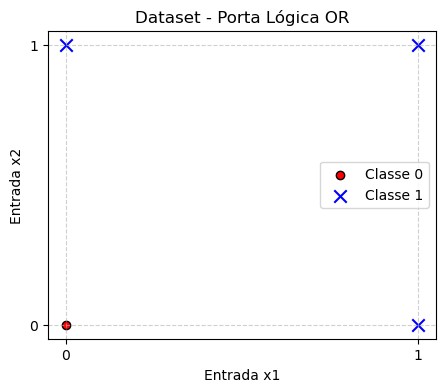

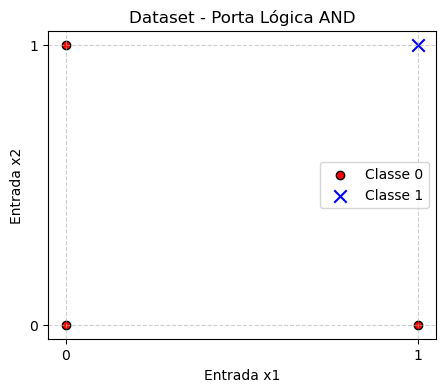

In [ ]:
# Dataset OR
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])

# Dataset AND
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

# Plot inicial dos datasets para visualização
def plot_dataset(X, y, title):
    plt.figure(figsize=(5, 4))
    # Separa os pontos pela classe para cores diferentes
    X_class0 = X[y == 0]
    X_class1 = X[y == 1]
    plt.scatter(X_class0[:, 0], X_class0[:, 1], color='red', marker='o', label='Classe 0', edgecolors='k')
    plt.scatter(X_class1[:, 0], X_class1[:, 1], color='blue', marker='x', label='Classe 1', s=80) # s=80 para marcar melhor
    plt.xlabel('Entrada x1')
    plt.ylabel('Entrada x2')
    plt.title(f'Dataset - Porta Lógica {title}')
    plt.xticks([0, 1])
    plt.yticks([0, 1])
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()

plot_dataset(X_or, y_or, "OR")
plot_dataset(X_and, y_and, "AND")

Como podemos ver nos gráficos, os pontos de ambas as portas OR e AND podem ser separados por uma única linha reta. Portanto, são problemas linearmente separáveis, e esperamos que o Perceptron consiga aprender a classificá-los corretamente.

### 1.2.2 Treinamento e Teste do Perceptron para OR e AND
Agora vamos utilizar o a função implementada do Perceotron para visuzalizar o seu treinamento

Treinando Perceptron para OR
--- Época 1/50. Erros: 1 ---
--- Época 2/50. Erros: 1 ---
--- Época 3/50. Erros: 1 ---
--- Época 4/50. Erros: 1 ---
--- Época 5/50. Erros: 2 ---
--- Época 6/50. Erros: 1 ---
--- Época 7/50. Erros: 2 ---
--- Época 8/50. Erros: 1 ---
--- Época 9/50. Erros: 2 ---
--- Época 10/50. Erros: 1 ---
--- Época 11/50. Erros: 2 ---
--- Época 12/50. Erros: 1 ---
--- Época 13/50. Erros: 2 ---
--- Época 14/50. Erros: 1 ---
--- Época 15/50. Erros: 2 ---
--- Época 16/50. Erros: 1 ---
--- Época 17/50. Erros: 2 ---
--- Época 18/50. Erros: 1 ---
--- Época 19/50. Erros: 2 ---
--- Época 20/50. Erros: 1 ---
--- Época 21/50. Erros: 0 ---

--- Resultados Finais ---
Pesos Treinados (w): [1.82136749 0.14284929]
Bias Treinado (b): -0.06418298832858915
Treinando Perceptron para AND
--- Época 1/50. Erros: 2 ---
--- Época 2/50. Erros: 1 ---
--- Época 3/50. Erros: 2 ---
--- Época 4/50. Erros: 1 ---
--- Época 5/50. Erros: 2 ---
--- Época 6/50. Erros: 2 ---
--- Época 7/50. Erros: 1 ---
--- É

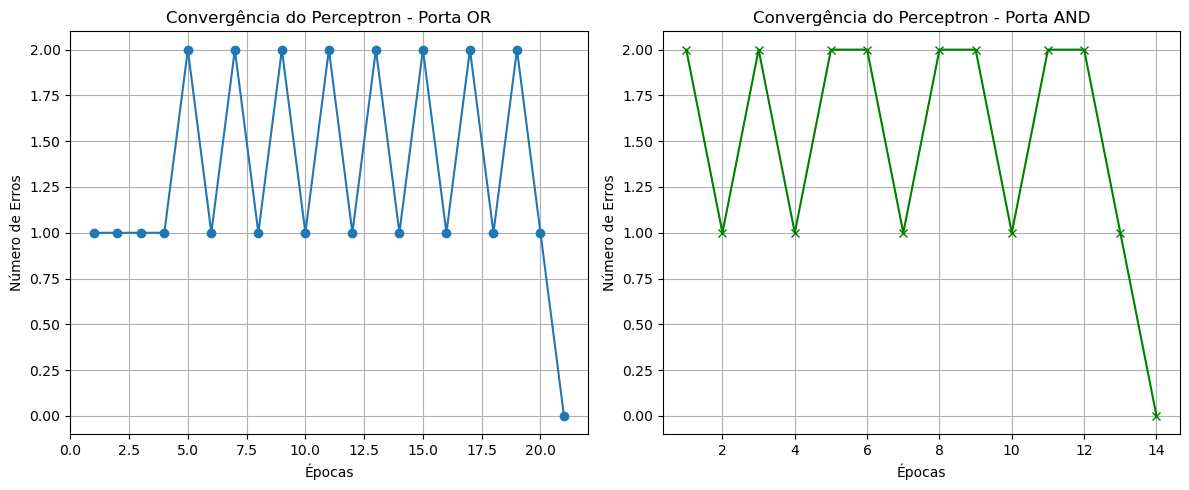

In [111]:
# ----- Treinamento para OR -----
print("Treinando Perceptron para OR")

W_or, b_or, erros_or = perceptron(X_or, y_or)

# ----- Treinamento para AND -----
print("Treinando Perceptron para AND")

W_and, b_and, erros_and = perceptron(X_and, y_and)

# Plotar erros por época
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(erros_or) + 1), erros_or, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de Erros')
plt.title('Convergência do Perceptron - Porta OR')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(erros_and) + 1), erros_and, marker='x', color='green')
plt.xlabel('Épocas')
plt.ylabel('Número de Erros')
plt.title('Convergência do Perceptron - Porta AND')
plt.grid(True)

plt.tight_layout()
plt.show()